In [1]:
# IMPORTANT
# Running this chunk lets you have multiple outputs from a single chunk; run it first!
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
import csv
#cost = pd.read_csv("C:/Users/mgbas/Documents/Bioinformatics/datasets/tuition_cost.csv","r")
cost = pd.read_csv(r"C:\Users\mgbas\Documents\Bioinformatics\datasets\tuition_cost.csv")
#loans = panda.read_csv (‘tuition_cost.csv’)


In [21]:
cost


,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458
...,...,...,...,...,...,...,...,...,...,...
2968,York Technical College,South Carolina,SC,Public,2 Year,NaN,5740,5740,12190,12190
2969,Young Harris College,Georgia,GA,Private,4 Year,12372.0,29117,41489,29117,41489
2970,Youngstown State University,Ohio,OH,Public,4 Year,9400.0,8950,18350,14950,24350
2971,Yuba College,California,CA,Public,2 Year,NaN,1400,1400,8420,8420


In [ ]:
This data set contains the tuition costs in the USA. we have cost(in state and out of state) as numerical variable and type (Private or Public) as cateforical variables.

In [22]:
# Drop missing data
cost.dropna()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458
5,Adams State University,Colorado,CO,Public,4 Year,8782.0,9440,18222,20456,29238
6,Adelphi University,New York,NY,Private,4 Year,16030.0,38660,54690,38660,54690
...,...,...,...,...,...,...,...,...,...,...
2964,Yeshivath Viznitz,New York,NY,Private,4 Year,4050.0,10000,14050,10000,14050
2965,York College,Nebraska,NE,Private,4 Year,7220.0,19310,26530,19310,26530
2966,York College of Pennsylvania,Pennsylvania,PA,Private,4 Year,11200.0,20100,31300,20100,31300
2969,Young Harris College,Georgia,GA,Private,4 Year,12372.0,29117,41489,29117,41489


In [23]:
cost.info

<bound method DataFrame.info of                                       name           state state_code  \
0                   Aaniiih Nakoda College         Montana         MT   
1             Abilene Christian University           Texas         TX   
2     Abraham Baldwin Agricultural College         Georgia         GA   
3                          Academy College       Minnesota         MN   
4                Academy of Art University      California         CA   
...                                    ...             ...        ...   
2968                York Technical College  South Carolina         SC   
2969                  Young Harris College         Georgia         GA   
2970           Youngstown State University            Ohio         OH   
2971                          Yuba College      California         CA   
2972                    Zane State College            Ohio         OH   

            type degree_length  room_and_board  in_state_tuition  \
0         Public       

In [24]:
cost.loc[cost['type'] == "Public", 'in_state_tuition'].min()
cost.loc[cost['type'] == "Public", 'in_state_tuition'].max()

480

26826

In [25]:
cost.loc[cost['type'] == "Private", 'in_state_tuition'].min()
cost.loc[cost['type'] == "Private", 'in_state_tuition'].max()

958

59985

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 0, 'In State Cost of Tuition')

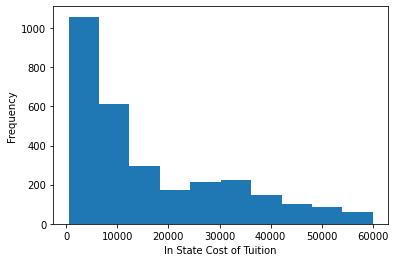

In [26]:
# Create a histogram
cost['in_state_tuition'].plot(kind = "hist")
plt.xlabel('In State Cost of Tuition') # add a label

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 0, 'Out Of State Tuition')

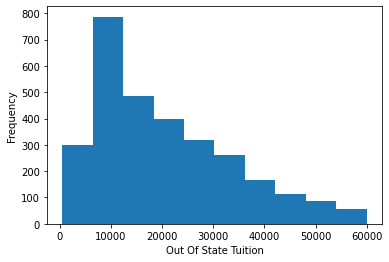

In [28]:
# Create a histogram
cost['out_of_state_tuition'].plot(kind = "hist")
plt.xlabel('Out Of State Tuition') # add a label

<AxesSubplot:>

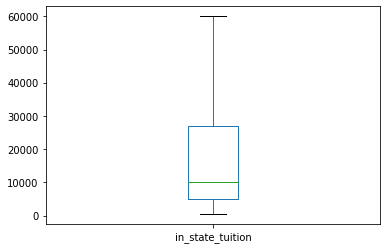

In [29]:
cost['in_state_tuition'].plot(kind = "box")

<AxesSubplot:>

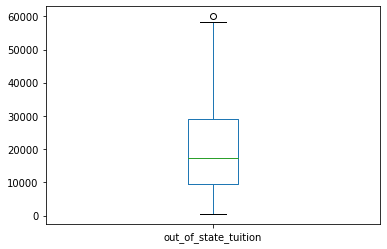

In [30]:
cost['out_of_state_tuition'].plot(kind = "box")

In [ ]:
The box plot distribution of out of state tuition shows that the cost is approximately equally distributed among states but its obvious that the distribution fail the equal variance assumption.

In [31]:
# Select variables (with `filter`), filter only one color (with `query`) and calculate statistics (end each function with \)
cost.filter(['type', 'in_state_tuition']) \
.query('type == "Public"') \
.agg(['mean', 'std'])

,in_state_tuition
mean,6037.799242
std,3562.718059


In [32]:
cost.filter(['type', 'in_state_tuition']) \
.query('type == "Private"') \
.agg(['mean', 'std'])

,in_state_tuition
mean,29432.435597
std,13541.888292


In [ ]:
The summary statistics for Public tuition cost in state we have a mean cost of $6037.8 and a standard deviation of 3562.72.The summary statistics for tuition cost in state we have a mean cost of $6037.8 and a standard deviation of 3562.72.
The summary statistics for Private tuition cost in state we have a mean cost of $29432.45 and a standard deviation of 13541.9.